**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import matplotlib.pylab as plt

import os
import json
import numpy as np
import seaborn

import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    
    
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0,0.5,'endogenous')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


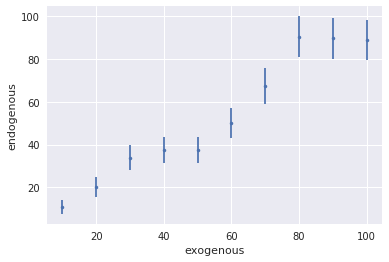

In [3]:
slope=1
intercept=0
x = np.linspace(10,100,10)
y = line(slope, x, intercept, errors=errors)
plt.errorbar(x, y, yerr=[errors(yy) for yy in y], linestyle=None, fmt='.')
plt.xlabel('exogenous')
plt.ylabel('endogenous')

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
print(y)

[ 10.96228604  20.17838222  33.90863884  37.33608447  37.58394944
  50.13427533  67.35333983  90.36031827  89.58628605  88.6502971 ]


In [5]:
print(x)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


In [6]:
sm.add_constant(x)

array([[   1.,   10.],
       [   1.,   20.],
       [   1.,   30.],
       [   1.,   40.],
       [   1.,   50.],
       [   1.,   60.],
       [   1.,   70.],
       [   1.,   80.],
       [   1.,   90.],
       [   1.,  100.]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [7]:
#THE WRONG WAY
smfitwrong = smf.OLS(y, x).fit()
smfitwrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     716.3
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           6.87e-10
Time:                        21:49:58   Log-Likelihood:                -33.128
No. Observations:                  10   AIC:                             68.26
Df Residuals:                       9   BIC:                             68.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9554      0.036     26.764      0.000         0.875     1.036
==============================================================================
Omnibus:                        0.789   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.674   Jarque-Bera (JB):                0.241
Skew:                           0.363   Prob(JB):                        0.886
Kurtosis:                       2.770   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#THE RIGHT WAY
smfitright = smf.OLS(y, sm.add_constant(x)).fit()
smfitright.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     135.4
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.71e-06
Time:                        21:49:58   Log-Likelihood:                -33.126
No. Observations:                  10   AIC:                             70.25
Df Residuals:                       8   BIC:                             70.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.2751      5.074      0.054      0.958       -11.426    11.976
x1             0.9515      0.082     11.635      0.000         0.763     1.140
==============================================================================
Omnibus:                        0.918   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.266
Skew:                           0.388   Prob(JB):                        0.876
Kurtosis:                       2.816   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## after adding intercpet to fit data, the R-squared decreased. I think it is because when we generate the data, it is without constant.

# 4. plot the data (as points) and both statsmodels fits

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


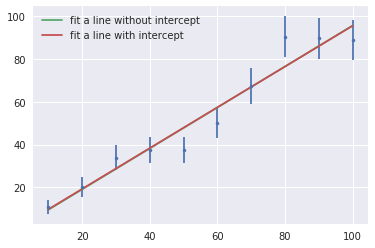

In [9]:
plt.errorbar(x, y, yerr=[errors(yy) for yy in y], linestyle=None, fmt='.')
plt.plot(x, smfitwrong.predict(x), label="fit a line without intercept")
plt.plot(x, smfitright.predict(sm.add_constant(x)), label="fit a line with intercept")
plt.legend()
plt.show()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

<Container object of 3 artists>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


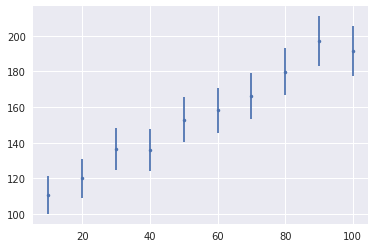

In [10]:
slope = 1
intercept = 100* slope
y = line(slope, x, intercept, errors=errors)
plt.errorbar(x, y, yerr=[errors(yy) for yy in y], linestyle=None, fmt='.')

# 6. repeat step 3

In [11]:
#THE WRONG WAY
smfitwrong = smf.OLS(y, x).fit()
smfitwrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     89.52
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           5.66e-06
Time:                        21:49:58   Log-Likelihood:                -52.812
No. Observations:                  10   AIC:                             107.6
Df Residuals:                       9   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.4181      0.256      9.462      0.000         1.840     2.996
==============================================================================
Omnibus:                        0.639   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.539
Skew:                          -0.058   Prob(JB):                        0.764
Kurtosis:                       1.868   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#THE RIGHT WAY
smfitright = smf.OLS(y, sm.add_constant(x)).fit()
smfitright.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     316.6
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.02e-07
Time:                        21:49:58   Log-Likelihood:                -28.926
No. Observations:                  10   AIC:                             61.85
Df Residuals:                       8   BIC:                             62.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        102.3363      3.334     30.694      0.000        94.648   110.025
x1             0.9562      0.054     17.794      0.000         0.832     1.080
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   2.753
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.581
Skew:                           0.501   Prob(JB):                        0.748
Kurtosis:                       2.375   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## after adding intercept to original data, R-squared of model with intercept increases compared with the model without intercept. I think it is because when we generate the data, it is with constant.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [13]:
#THE WRONG WAY
smWLSfitwrong = smf.WLS(y, x, weight=1/errors(y)).fit()
smWLSfitwrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            WLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     89.52
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           5.66e-06
Time:                        21:49:58   Log-Likelihood:                -52.812
No. Observations:                  10   AIC:                             107.6
Df Residuals:                       9   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.4181      0.256      9.462      0.000         1.840     2.996
==============================================================================
Omnibus:                        0.639   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.539
Skew:                          -0.058   Prob(JB):                        0.764
Kurtosis:                       1.868   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#THE RIGHT WAY
smWLSfitright = smf.WLS(y, sm.add_constant(x), weight=1/errors(y)).fit()
smWLSfitright.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            WLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     316.6
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.02e-07
Time:                        21:49:58   Log-Likelihood:                -28.926
No. Observations:                  10   AIC:                             61.85
Df Residuals:                       8   BIC:                             62.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        102.3363      3.334     30.694      0.000        94.648   110.025
x1             0.9562      0.054     17.794      0.000         0.832     1.080
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   2.753
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.581
Skew:                           0.501   Prob(JB):                        0.748
Kurtosis:                       2.375   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


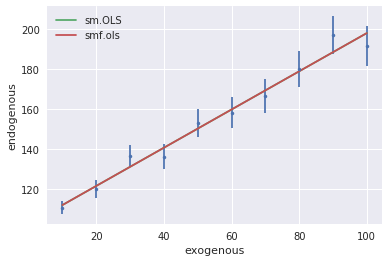

In [16]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
plt.errorbar(x, y, yerr=errors(x), fmt='.')
plt.plot(x, smfitright.fittedvalues, '-', label="sm.OLS")
plt.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
plt.xlabel("exogenous")
plt.ylabel("endogenous")
plt.legend();